In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/utkhare/Desktop/Documents/Onwards2015.csv")

C:\Users\utkhare\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Goals 
# Find the best partnerships per innings phase

In [4]:
# Function to get the runs scored by each partnership
def get_partnership_runs(df): 
    return pd.DataFrame (
    df.groupby('partners')['batsman_runs'].sum().sort_values(ascending = False).reset_index())

In [5]:
# Function to get the number of innings played together
def get_partnership_innings(df): 
    temp_df = pd.DataFrame ( 
    df.groupby('partners')['id'].nunique().sort_values(ascending = False).reset_index())
    temp_df.rename(columns={"id": "innings"}, inplace=True)
    temp_df["innings"] = pd.to_numeric(temp_df["innings"])
    return temp_df

In [6]:
# Function to get the number of balls faced together
def get_partnership_balls(df): 
    return pd.DataFrame ( 
    df.groupby('partners')['ball'].count().sort_values(ascending = False).reset_index())

In [7]:
# Function to merge and create a new DataFrame with Name, Total Runs Scored, Total Innings Played, 
# RunRate and Average are also calculated and added to the DataFrame
def merge_dfs(df_runs, df_balls, df_innings):
    df_final = df_runs.merge(df_balls, on = 'partners', how = 'left')
    df_final = df_final.merge(df_innings, on = 'partners', how = 'left')
    
    df_final['RunRate'] = 6 * df_final['batsman_runs'] / df_final['ball']
    df_final['Average'] = df_final['batsman_runs'] / df_final['innings']
    
    return df_final

In [8]:
def filter_df(orig_df, num_innings, num_runs): 
    return orig_df[(orig_df.innings >= num_innings) & (orig_df.batsman_runs >= num_runs)].reset_index()

In [9]:
def plot_df(final_df, avg_axis, rr_axis, plot_title): 
    plt.figure(figsize = (16,8))
    plt.scatter(final_df.RunRate, final_df.Average)
    for i in range(len(final_df)): 
        plt.text(final_df['RunRate'][i], final_df['Average'][i], final_df['partners'][i])
    
    plt.axvline(rr_axis , ls = '--', color = 'grey')
    plt.axhline(avg_axis , ls = '--', color = 'grey')
    plt.title(plot_title)
    plt.xlabel("RunRate")
    plt.ylabel("Runs Per Innings")
    plt.show()

In [10]:
# Create Partnership Column by joining batsman and non_striker (sorted)
df['partners'] = [' & '.join(sorted(tup)) for tup in zip(df['batsman'], df['non_striker'])]

In [11]:
powerplay_df = df[df.over <= 5]

In [12]:
midovers_df = df[(df.over > 5) & (df.over < 15)]

In [13]:
deathover_df = df[df.over >= 15]

In [14]:
df_final = {}
i = 0 

for df in (powerplay_df, midovers_df, deathover_df): 
    df_runs = get_partnership_runs(df)
    df_innings = get_partnership_innings(df)
    df_balls = get_partnership_balls(df)
    df_final[i] = merge_dfs(df_runs, df_balls, df_innings)
    i = i + 1

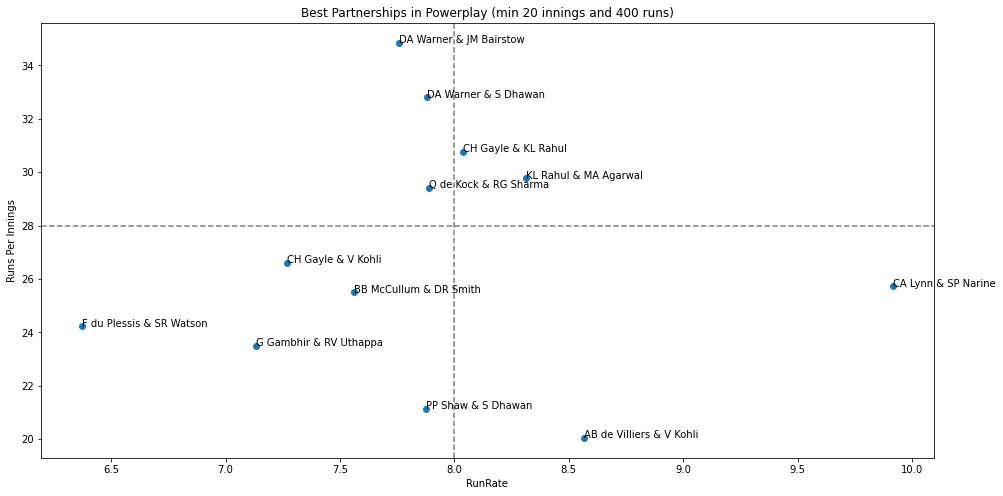

In [15]:
df_powerplay_filtered = filter_df(df_final[0], 20, 400)
plot_df(df_powerplay_filtered, 28, 8, "Best Partnerships in Powerplay (min 20 innings and 400 runs)")

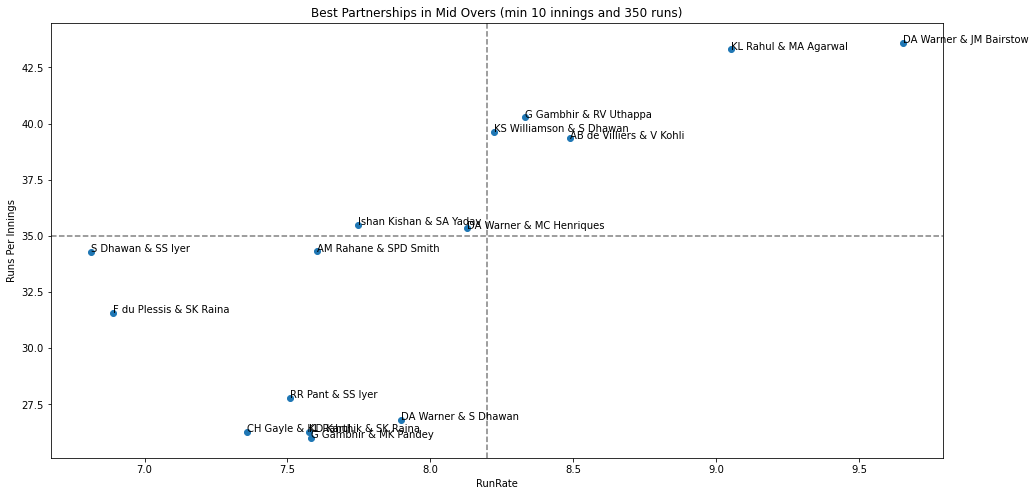

In [16]:
df_midovers_filtered = filter_df(df_final[1], 10, 350)
plot_df(df_midovers_filtered, 35, 8.2, "Best Partnerships in Mid Overs (min 10 innings and 350 runs)")

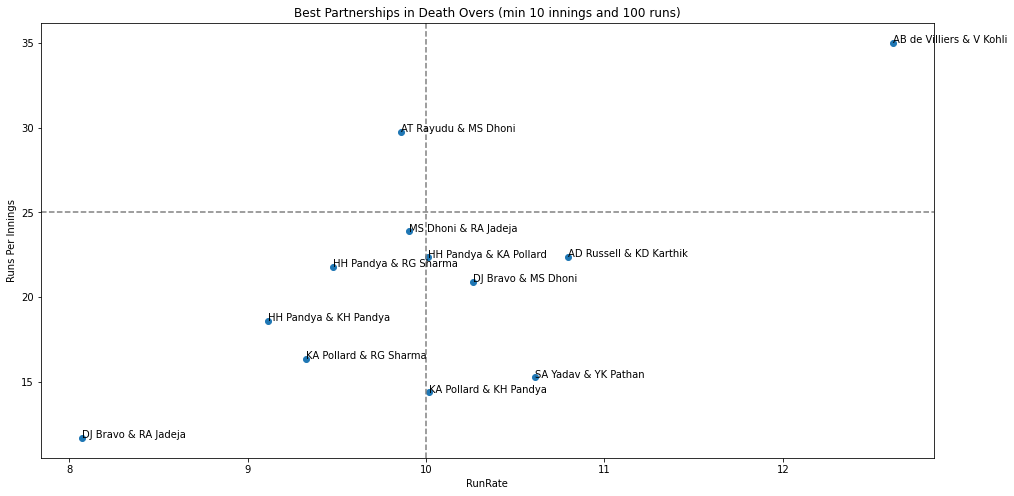

In [17]:
df_endovers_filtered = filter_df(df_final[2], 10, 100)
plot_df(df_endovers_filtered, 25, 10, "Best Partnerships in Death Overs (min 10 innings and 100 runs)")

In [18]:
df_powerplay_filtered

,index,partners,batsman_runs,ball,innings,RunRate,Average
0,0,DA Warner & S Dhawan,1476,1124,45,7.879004,32.800000
1,1,CH Gayle & KL Rahul,892,666,29,8.036036,30.758621
2,2,G Gambhir & RV Uthappa,869,731,37,7.132695,23.486486
3,3,Q de Kock & RG Sharma,794,604,27,7.887417,29.407407
4,4,CH Gayle & V Kohli,745,615,28,7.268293,26.607143
5,5,DA Warner & JM Bairstow,697,539,20,7.758813,34.850000
6,6,BB McCullum & DR Smith,663,526,26,7.562738,25.500000
7,7,CA Lynn & SP Narine,643,389,25,9.917738,25.720000
8,8,KL Rahul & MA Agarwal,625,451,21,8.314856,29.761905
9,9,PP Shaw & S Dhawan,613,467,29,7.875803,21.137931


In [19]:
df_midovers_filtered

,index,partners,batsman_runs,ball,innings,RunRate,Average
0,0,AB de Villiers & V Kohli,1259,890,32,8.487640,39.343750
1,1,RR Pant & SS Iyer,861,688,31,7.508721,27.774194
2,2,KS Williamson & S Dhawan,555,405,14,8.222222,39.642857
3,3,Ishan Kishan & SA Yadav,497,385,14,7.745455,35.500000
4,4,AM Rahane & SPD Smith,446,352,13,7.602273,34.307692
5,5,G Gambhir & RV Uthappa,443,319,11,8.332288,40.272727
6,6,DA Warner & JM Bairstow,436,271,10,9.653137,43.600000
7,7,KL Rahul & MA Agarwal,433,287,10,9.052265,43.300000
8,8,DA Warner & S Dhawan,429,326,16,7.895706,26.812500
9,9,DA Warner & MC Henriques,424,313,12,8.127796,35.333333


In [20]:
df_endovers_filtered

,index,partners,batsman_runs,ball,innings,RunRate,Average
0,0,HH Pandya & KA Pollard,514,308,23,10.012987,22.347826
1,1,AB de Villiers & V Kohli,490,233,14,12.618026,35.000000
2,2,MS Dhoni & RA Jadeja,406,246,17,9.902439,23.882353
3,3,AT Rayudu & MS Dhoni,327,199,11,9.859296,29.727273
4,4,HH Pandya & KH Pandya,316,208,17,9.115385,18.588235
5,5,AD Russell & KD Karthik,313,174,14,10.793103,22.357143
6,7,DJ Bravo & MS Dhoni,272,159,13,10.264151,20.923077
7,8,HH Pandya & RG Sharma,218,138,10,9.478261,21.800000
8,9,KA Pollard & RG Sharma,213,137,13,9.328467,16.384615
9,11,KA Pollard & KH Pandya,187,112,13,10.017857,14.384615


# Conclusion 

In [21]:
# The much maligned Rahul for his slow starts, is actually much ahead in strike rate with Agarwal by his side. 
# However, Warner with Dhawan or Bairstow were giving much steadier starts with slightly slower runrates. 
# Lynn and Narine are outliers in strike-rate, but don't have enough consistency resulting in a bad average

In [22]:
# In the mid overs, again Rahul - Mayank and Warner - Bairstow pair working wonders. 
# the problem for both these teams (KxIP and SRH) is that there are no middle order batsmen in the top few run-getters
# this shows that if one of these batsmen gets out, the team will struggle
# On the other hand, if you look at RCB, who didn't have the opening pair listed under powerplay, shine brightly in mid overs
# with ABD and Kohli taking control
# On the other hand, check out successful teams like DC , CSK , MI etc. 
# They have top player partnerships in powerplay and midovers too

In [23]:
# In Death overs, ABD and Kohli's numbers eclipse everyone else. 
# However, other teams have multiple player partnerships in the death overs in the top run getters. 
# MI, CSK have 3-4 partnerships, while others have none. Shows why they are the best teams in the league